<a href="https://colab.research.google.com/github/Coder731/machine-learning-project/blob/main/SLF_Project_LearnerNotebook_LowCode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext nb_black


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
from string import Template
data = pd.read_csv("used_device_data.csv")
print(
    '\n___________________1\n',
    'data.head(2):\n',
    data.head(2),
    '\n___________________2\n',
    'data.shape:\n',
    data.shape,
    '\n___________________3\n',
    'data.info():\n',
    data.info(),
    '\n___________________4\n',
    'data.describe().T:\n',
    data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [2]:
# duplicates
headings_list=list(data.columns.values)
countT=0
countF=0
a=0
holder={'a':'0','b':'1'}
string_holder=' : '
holder_duplicates_counted={}

# then run for loop:
for head_n, heading in enumerate(headings_list):
  hold_key=heading
  strg_var='\"{}\"'.format(heading)
  hold_value=headings_list[head_n] # hold_value=list[#]
  col_el_1=data[headings_list[head_n]].head(1).to_string(index=False) # col_hold=df[list[#]]
  # hold_value_3=headings_list['{}'.format(strg_var)] # hold_value_3=headings_list["heading"]
  # print("col_el_1:",col_el_1)
   # put strg_var between square brackets
  current_col_headg_in_brakts_n_quotes='[{}]'.format(strg_var)
  print("current_col_headg_in_brakts_n_quotes:",current_col_headg_in_brakts_n_quotes)
  data_col_i=data[Template("$obj").substitute(obj=heading)].head(2).to_string(index=False)
  # print("data_col_i (first 2 row(cell)values in col):")
  # print(data_col_i)
  print("data[",Template("$heading").substitute(heading=heading),"].unique():\n",data[heading].unique(),sep="")
  print("")

  # pre variable(s):
  outer_key=heading
  # assemble dictionary within dictionary (depth of 2 at least):
  Template("$outer_key").substitute(outer_key=outer_key)
  # heading1 : value_is_inner_dictionary
  # inner_dictionary is:
  # key : value
  
  # if head_n==1:
  #   break

current_col_headg_in_brakts_n_quotes: ["brand_name"]
data[brand_name].unique():
['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']

current_col_headg_in_brakts_n_quotes: ["os"]
data[os].unique():
['Android' 'Others' 'iOS' 'Windows']

current_col_headg_in_brakts_n_quotes: ["screen_size"]
data[screen_size].unique():
[14.5  17.3  16.69 25.5  15.32 16.23 13.84 15.77 15.47 15.9  16.74 25.43
 20.32 15.29 12.88 15.24 15.37 16.71 25.6  15.34 16.59 16.81 20.42 10.16
 17.78 17.32 15.39 12.7  15.44  5.28 15.27 15.8  15.72 12.83  7.62  7.75
 10.03 15.42 16.56  5.18 16.64 16.94 16.33 10.29 16.43 12.93 16.36 16.66
 16.21 17.5  16.13 16.28 14.4  15.21 20.12 16.89 16.48 16.31 25.53 12.73
 20.55 30.71 27.94 25.45 18.01 14.35 16.15 23.04 10.34 10.24 12.78 

<IPython.core.display.Javascript object>

TODO:
get duplicated values list for each column
=)
if duplicated = True 
- for each value
- in a column
- for first value only
update dict / append to list
of duplicates
duplicates = []
or
duplicates={key_is_entry_which_is_duplicated:value_is_incrementing_count_of_duplicated_entry}
CURRENT
Replicate first key :value .update()

In [3]:
# begin assembling holder dictionary for heading key and True/False value:
# holder={ heading : data[heading].duplicated() }
# holder.append() # only works on list use update for dictionary:
# holder.update({"heading": "data[heading].duplicated()"})
duplicate_boolean=data[heading].duplicated().to_string(index=False)
holder.update({Template("$heading").substitute(heading=heading): Template("$duplicate_boolean").substitute(duplicate_boolean=duplicate_boolean)})
# holder={}
print(holder)

{'a': '0', 'b': '1', 'normalized_new_price': 'False\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\n True\nFalse\nFalse\nFalse\nFa

<IPython.core.display.Javascript object>

In [4]:
holder_duplicates_counted={}
outer_key=heading
Template("$outer_key").substitute(outer_key=outer_key)

'normalized_new_price'

<IPython.core.display.Javascript object>

In [5]:
data[heading].duplicated().head(4).to_string(index=False)

'False\nFalse\nFalse\nFalse'

<IPython.core.display.Javascript object>

Check for duplicates for single iteration of 1st for loop - DONE

TODO
1
insert second for loop 
into 
first for loop

2
amalgamate
code cells
used in 
making
2nd for loop
into
single block of code
to be incorporated
into first for loop

In [6]:
current_count_dict={}
for val_count, value in enumerate(data[heading].duplicated()) :
    # print(value)
    if value == True:
        current_count_dict.update({Template("$val_count").substitute(val_count=val_count) : Template("$value").substitute(value=value)})
# print(current_count_dict)
print(len(current_count_dict))
print(len(data[heading].duplicated()))

466
3454


<IPython.core.display.Javascript object>

In [7]:
len(data[heading].duplicated()) - len(current_count_dict)

2988

<IPython.core.display.Javascript object>

In [8]:
data[heading].unique()

array([4.71510025, 5.51901794, 5.88463072, ..., 6.25153773, 4.62418819,
       4.27999391])

<IPython.core.display.Javascript object>

In [9]:
len(data[heading].unique())

2988

<IPython.core.display.Javascript object>

In [10]:
# difference between number of duplicated values in column and number of values shown as True equals the number of unique values in the column
# That is, once duplicates are removed, only unique values remain (by definition) 
len(data[heading].duplicated()) - len(current_count_dict)==len(data[heading].unique())

True

<IPython.core.display.Javascript object>

TODO: next assemble key and value into holder variable
    - why? - to show if duplicates
    - how?
    - note intermediate step: check if col (row?) has duplicates
    in above loop
        key-value-pair:
        part 1 of 3: key
        part 2 of 3: string_holder=' : '
        part 3 of 3: value

    column_x : 'False'

    then push this as a key value pair to holder variable
        - iteratively

1.
So, key is not col_el_1{is actually .to_string(index= False) to remove excess output} but 
current_col_headg_in_brakts_n_quotes{["word"]}
(technically just: strg_var{"word"}
[or just heading{word alone}])

2.
check for duplicates per row
potentially, just: .duplicates(data[strg_val])
or .duplicates(data current_col_headg_in_brakts_n_quotes) # without space, so concatenated
i.e. .duplicates()

2.1
https://www.digitalocean.com/community/tutorials/python-string-concatenation
a= 'asdf'
b= 'lkjh'
c= a + b
print(c)
Output: asdflkjh

3.
then need to set key and value
or push key value to dictionary

In [11]:
# https://pythonprinciples.com/ask/how-do-you-create-a-variable-number-of-variables/
my_vars = {}
for i in range(10):
    var_name = "var%d" % i
    my_vars[var_name] = i

print(my_vars["var2"])
print(my_vars)

2
{'var0': 0, 'var1': 1, 'var2': 2, 'var3': 3, 'var4': 4, 'var5': 5, 'var6': 6, 'var7': 7, 'var8': 8, 'var9': 9}


<IPython.core.display.Javascript object>

In [12]:
data[heading].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451     True
3452    False
3453    False
Name: normalized_new_price, Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

duplicates final answer:

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [14]:
duplicates_list=data.duplicated()

<IPython.core.display.Javascript object>

In [15]:
recount_True=0
for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
    if (duplicate_boolean_recount==True):
        recount_True+=1


<IPython.core.display.Javascript object>

In [16]:
print(recount_True)

0


<IPython.core.display.Javascript object>

as recount_True is 0, there are duplicates in the data dataset

now go one level deeper with duplicate check:

In [17]:
# how many?

<IPython.core.display.Javascript object>

In [18]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

15 columns in data set

just do first heading instance first:

In [19]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==0):
        print('heading ', count_3, ' is ', heading_count_3, sep='')
    if (count_3==0):
        break

heading 0 is brand_name


<IPython.core.display.Javascript object>

for brand_name: implement the following code block:

In [20]:
# heading_1 = brand_name
# make it def function :
def heading_1():
    duplicates_list=data['brand_name'].duplicated()

    recount_True=0
    for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
        if (duplicate_boolean_recount==True):
            recount_True+=1

    print(recount_True)
    print(duplicates_list)
    print(len(duplicates_list))
heading_1()

3420
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: brand_name, Length: 3454, dtype: bool
3454


<IPython.core.display.Javascript object>

In [21]:
'''
 do a check 
 to see if 3420 is actually the number of duplicates.
 also check length of the data set

 - DONE
'''

'\n do a check \n to see if 3420 is actually the number of duplicates.\n also check length of the data set\n\n - DONE\n'

<IPython.core.display.Javascript object>

In [22]:
# copy def (not call) of function heading_1
# use next function for headings 2 through 15:

def heading_2_to_15(heading):
    duplicates_list=data[heading].duplicated()

    recount_True=0
    for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
        if (duplicate_boolean_recount==True):
            recount_True+=1

    print('recount_True:',recount_True)
    print('duplicates_list:')
    print(duplicates_list)
    print('duplicates_list:',len(duplicates_list))


<IPython.core.display.Javascript object>

In [23]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==1):
        print('heading modified count ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==1):
        break

heading modified count 2 is os


<IPython.core.display.Javascript object>

In [24]:
# call function 
heading_2_to_15('os') # (heading 2 is os)

recount_True: 3450
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: os, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [25]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==2):
        print('heading modified count ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==2):
        break

heading modified count 3 is screen_size


<IPython.core.display.Javascript object>

In [26]:
heading_2_to_15('screen_size') # (heading 3 is screen_size)

recount_True: 3312
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: screen_size, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [27]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==3):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==3):
        break

heading 4 is 4g


<IPython.core.display.Javascript object>

In [28]:
heading_2_to_15('4g') # (heading 4 is 4g)

recount_True: 3452
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: 4g, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [29]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==4):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==4):
        break

heading 5 is 5g


<IPython.core.display.Javascript object>

In [30]:
heading_2_to_15('5g') # (heading 5 is 5g)

recount_True: 3452
duplicates_list:
0       False
1       False
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: 5g, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [31]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==5):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==5):
        break
heading_2_to_15(heading_count_3) # (heading 6 is main_camera_mp)

heading 6 is main_camera_mp
recount_True: 3412
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: main_camera_mp, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [32]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==6):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==6):
        break
heading_2_to_15(heading_count_3) # (heading 7 is selfie_camera_mp)

heading 7 is selfie_camera_mp
recount_True: 3416
duplicates_list:
0       False
1       False
2       False
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: selfie_camera_mp, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [33]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==7):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==7):
        break
heading_2_to_15(heading_count_3)

heading 8 is int_memory
recount_True: 3438
duplicates_list:
0       False
1       False
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: int_memory, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [34]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==8):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==8):
        break
heading_2_to_15(heading_count_3)

heading 9 is ram
recount_True: 3441
duplicates_list:
0       False
1       False
2        True
3       False
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: ram, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [35]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==9):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==9):
        break
heading_2_to_15(heading_count_3)

heading 10 is battery
recount_True: 3129
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: battery, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [36]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==10):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==10):
        break
heading_2_to_15(heading_count_3)

heading 11 is weight
recount_True: 2898
duplicates_list:
0       False
1       False
2        True
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: weight, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [37]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==11):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==11):
        break
heading_2_to_15(heading_count_3)

heading 12 is release_year
recount_True: 3446
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: release_year, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [38]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==12):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==12):
        break
heading_2_to_15(heading_count_3)

heading 13 is days_used
recount_True: 2530
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452    False
3453     True
Name: days_used, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [39]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==13):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==13):
        break
heading_2_to_15(heading_count_3)

heading 14 is normalized_used_price
recount_True: 360
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453     True
Name: normalized_used_price, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [40]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==14):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==14):
        break
heading_2_to_15(heading_count_3)

heading 15 is normalized_new_price
recount_True: 466
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451     True
3452    False
3453    False
Name: normalized_new_price, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

checkpoint for 15 heading _ s run - DONE

In [41]:
# len(duplicates_list)

<IPython.core.display.Javascript object>

In [42]:
# if len(duplicates_list)==countF:
#   print("all values are False")

<IPython.core.display.Javascript object>

In [43]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [44]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


<IPython.core.display.Javascript object>

### Checking for missing values

In [45]:
data.duplicated() ## Complete the code to check duplicate entries in the data

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [46]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [47]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [48]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [49]:
%matplotlib inline

<IPython.core.display.Javascript object>

In [50]:
plt.show()  # show the plot

<IPython.core.display.Javascript object>

27/01/2022 0056 h checkpoint

**`normalized_used_price`**

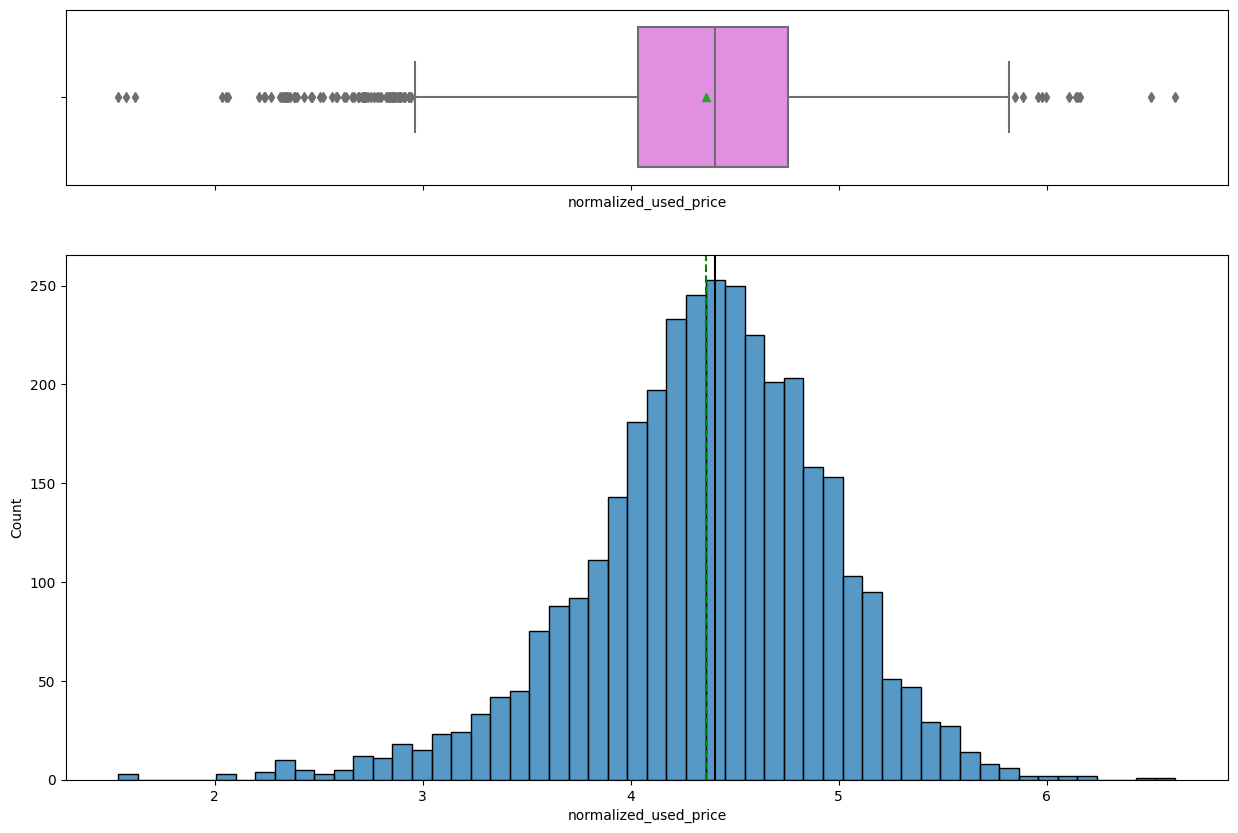

<IPython.core.display.Javascript object>

In [51]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

checkpoint 2 27Jan2022 0122 h

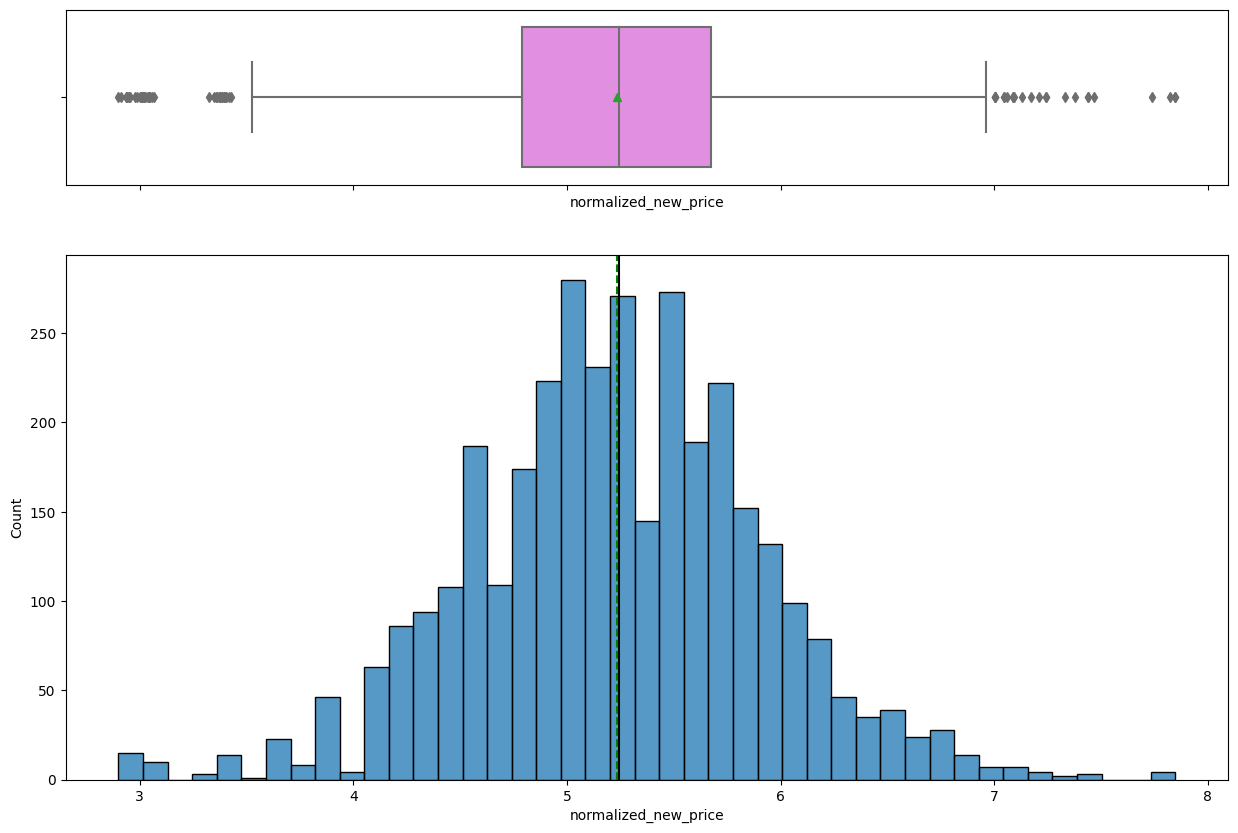

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df, 'normalized_new_price')  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

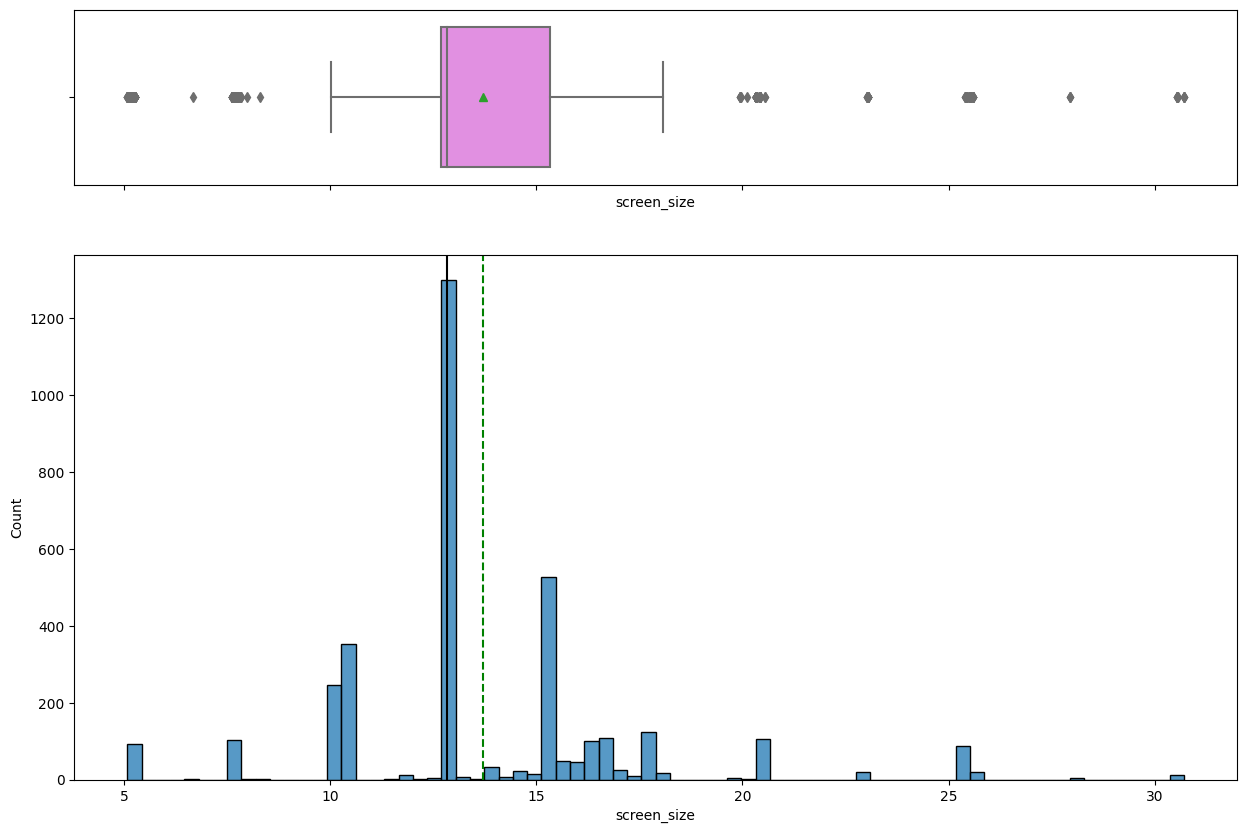

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, 'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

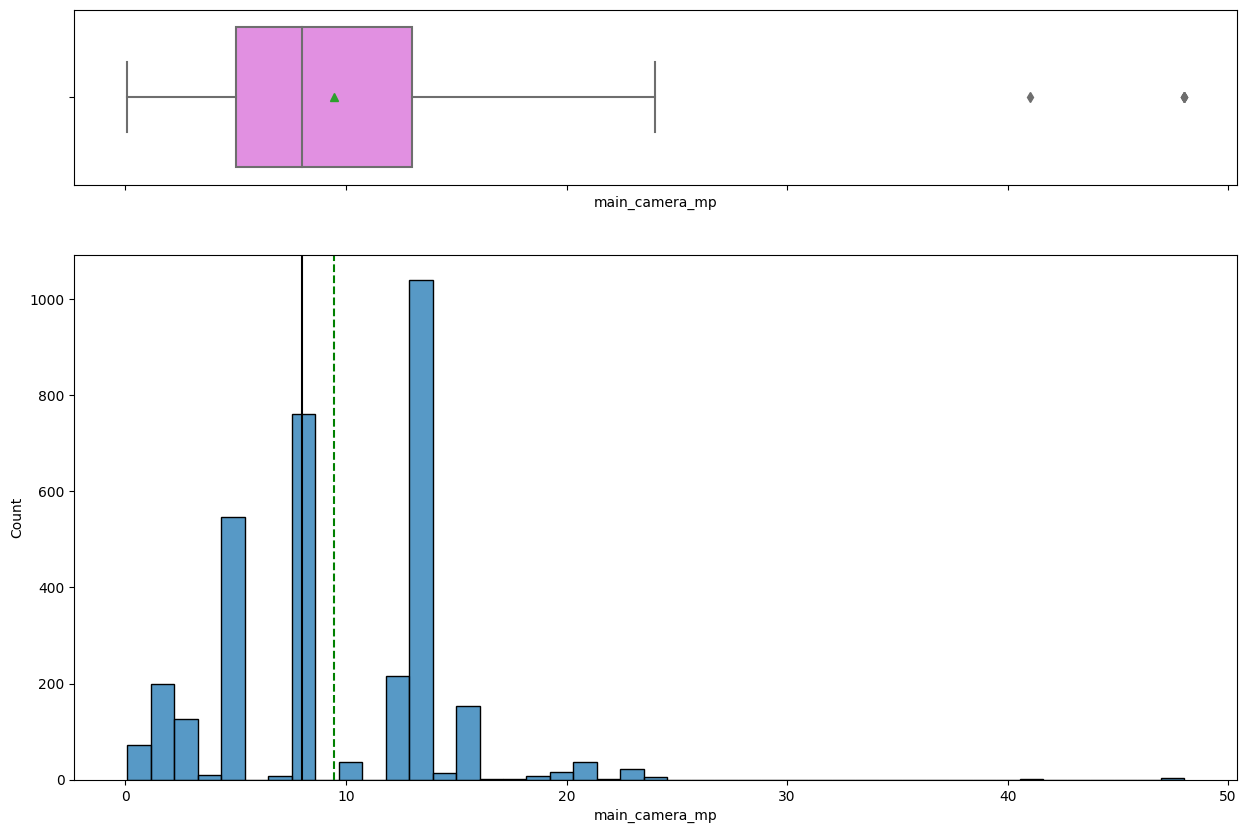

<IPython.core.display.Javascript object>

In [61]:
histogram_boxplot(df, 'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

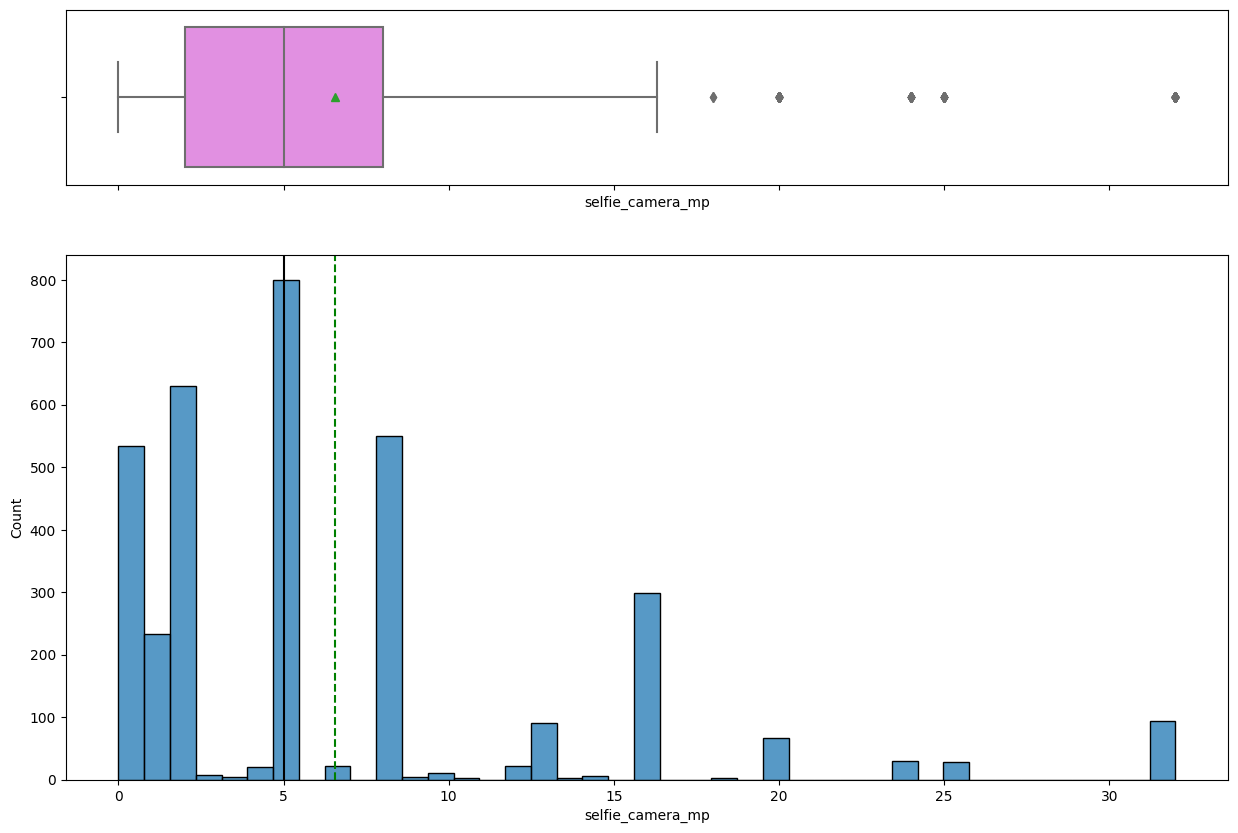

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(df, 'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

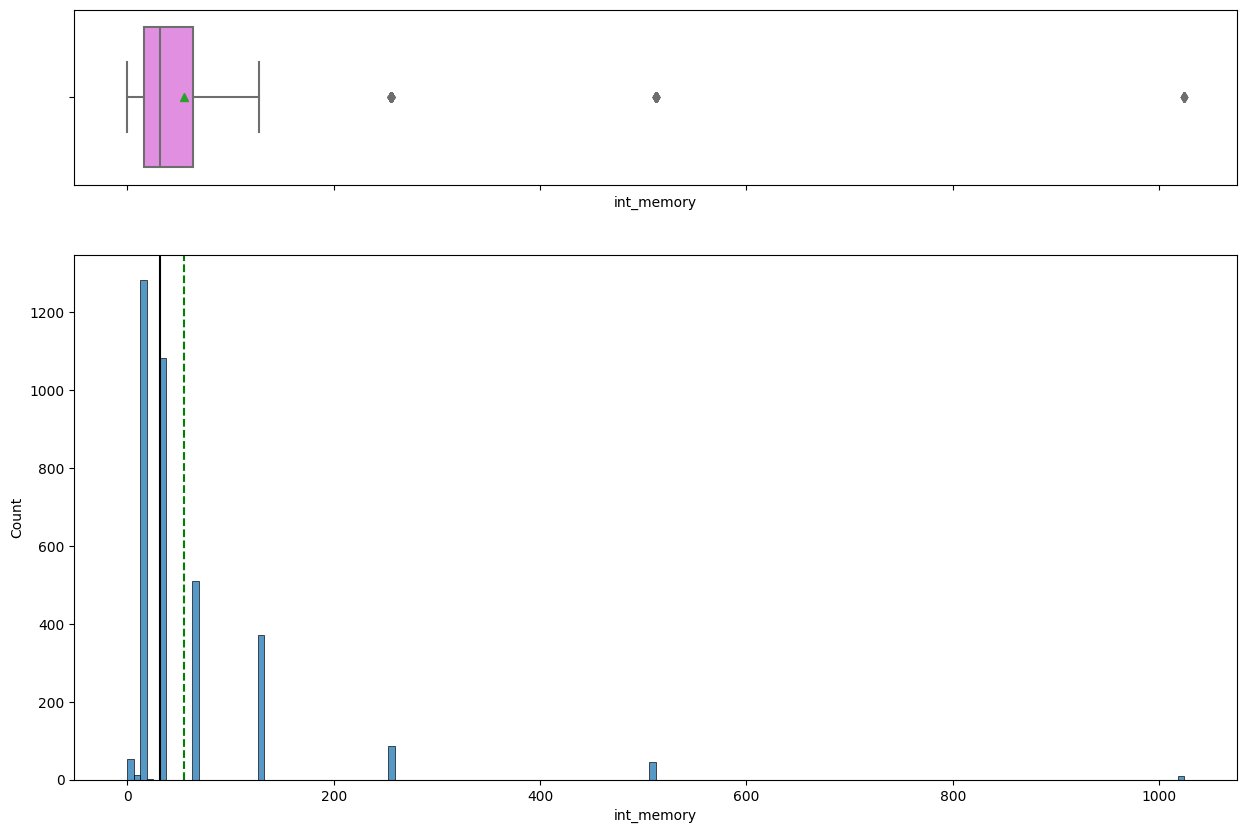

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(df, 'int_memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

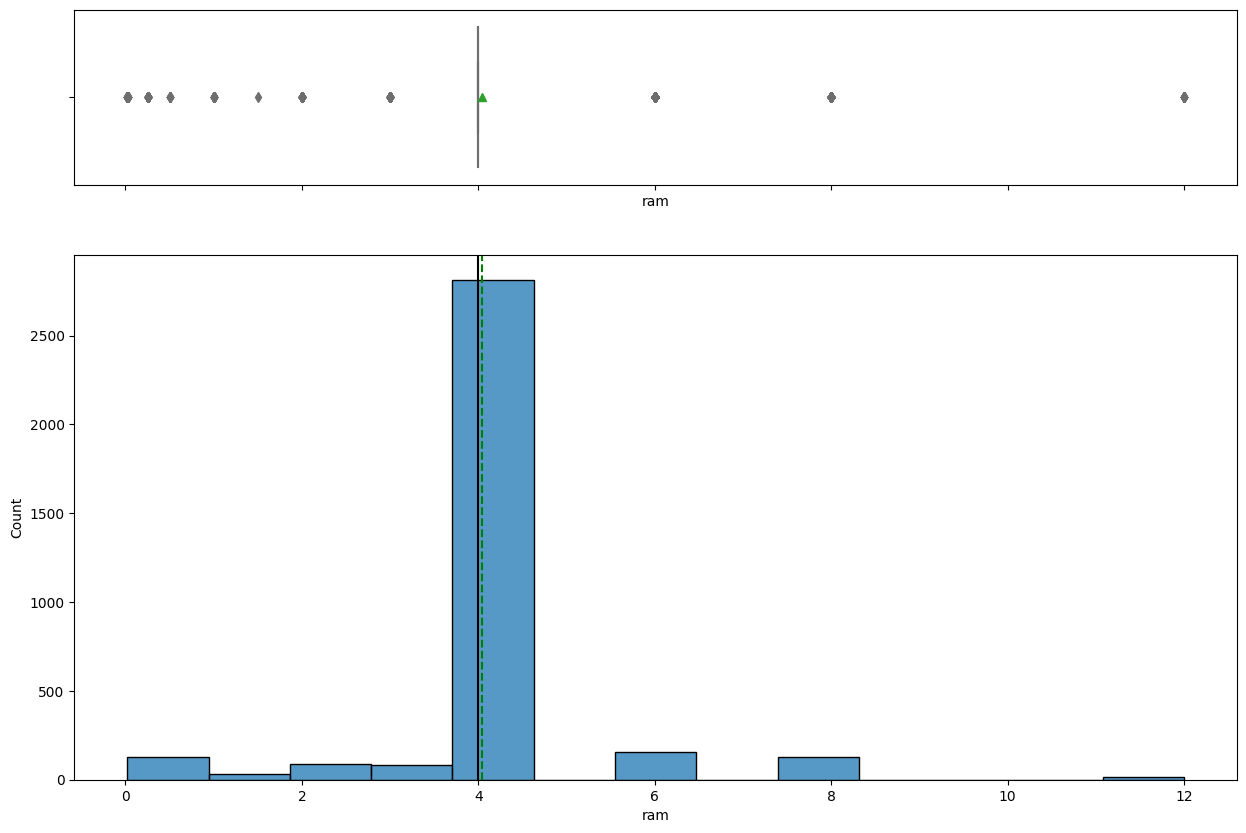

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(df, 'ram')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

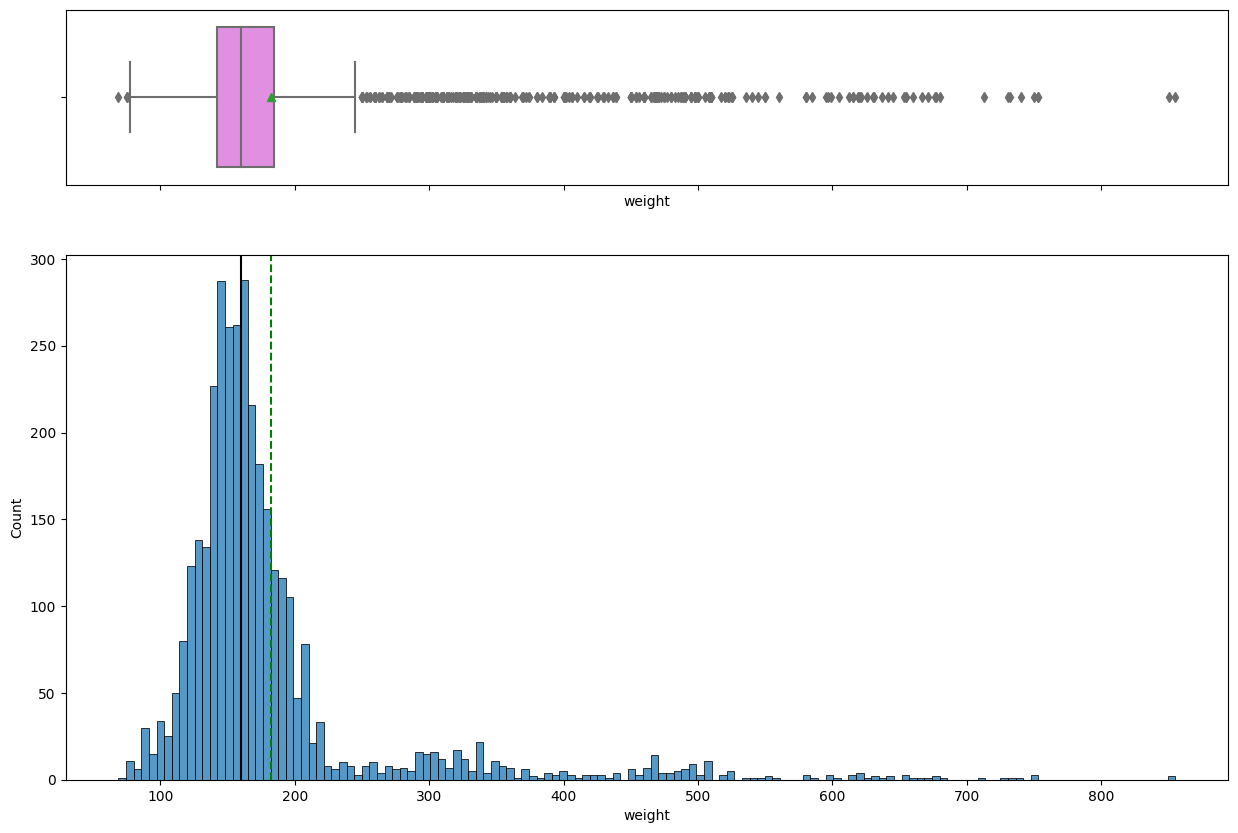

<IPython.core.display.Javascript object>

In [65]:
histogram_boxplot(df, 'weight')  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

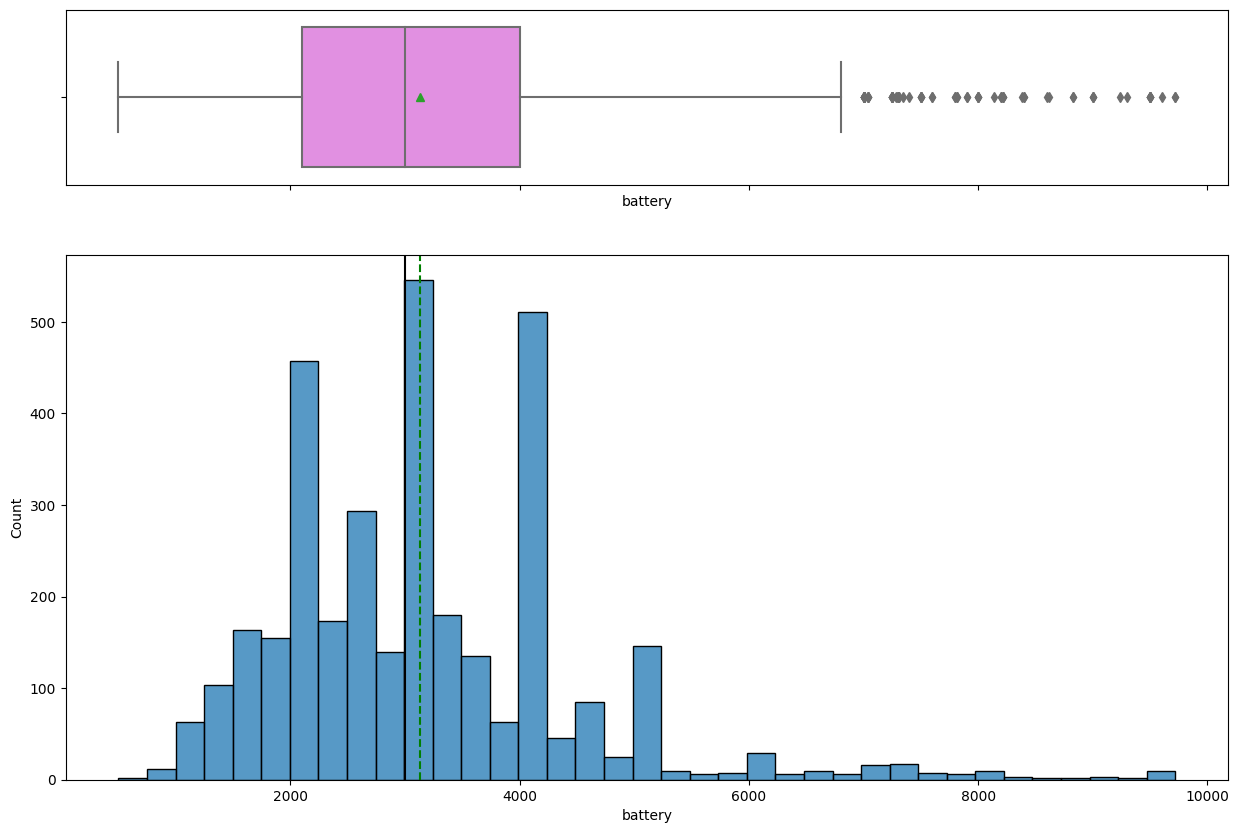

<IPython.core.display.Javascript object>

In [66]:
histogram_boxplot(df, 'battery')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

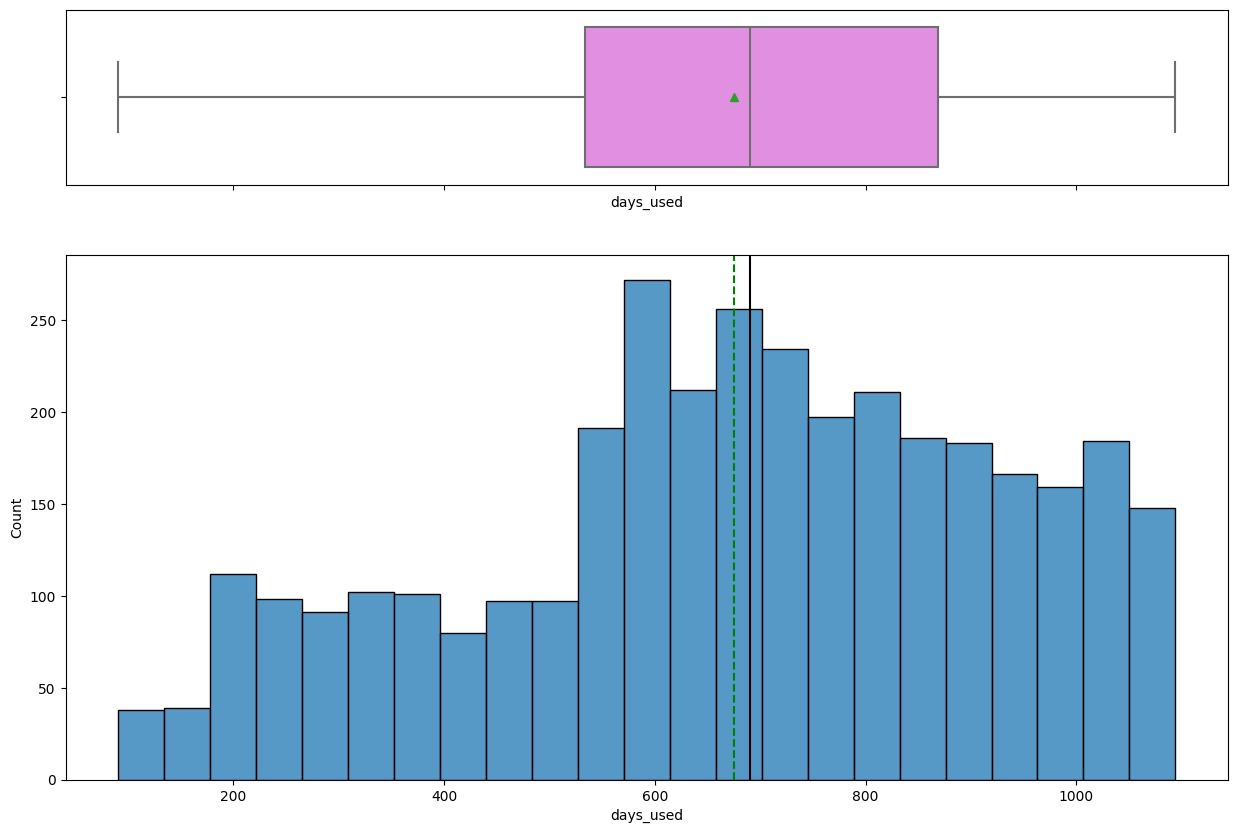

<IPython.core.display.Javascript object>

In [67]:
histogram_boxplot(df, 'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

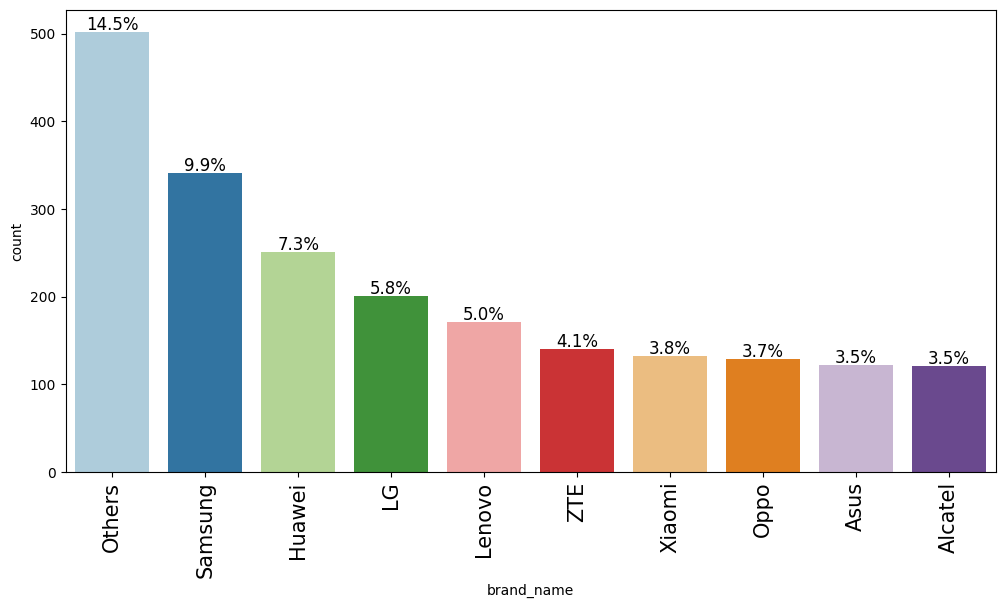

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

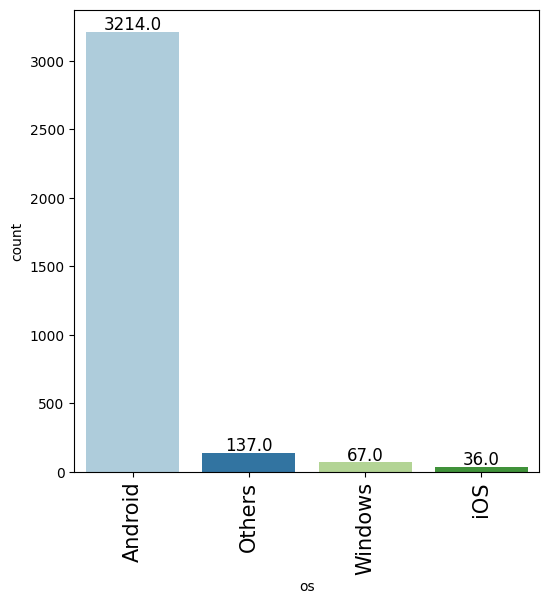

<IPython.core.display.Javascript object>

In [70]:
labeled_barplot(df, 'os') ## Complete the code to create labeled_barplot for 'os'

**`4g`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for '4g'

**`5g`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot('______') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot('_____') ## Complete the code to create a lineplot for release year and used price
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.'_______' ## Complete the code to check missing values in all the columns

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['_____'])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

# checking for missing values
df1.'_______' ## Complete the code to check missing values after imputing the above columns

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['_____'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.'_______' ## Complete the code to check missing values after imputing the above columns

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].'_______') ## Complete the code to impute the data with median

# checking for missing values
df1.'_______' ## Complete the code to check missing values after imputing the above columns

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

### Outlier Check



- Let's check for outliers in the data.

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
X = '_______'
y = '_______'

print(X.head())
print()
print(y.head())

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.'_______'(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = '_______' ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

## Model Building - Linear Regression


In [ ]:
olsmodel1 = sm.'_______' ## Complete the code to fit OLS model
print(olsmodel1.summary())

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression('_______') ## Complete the code to check the performance on test data
olsmodel1_test_perf

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif('_______')  ## Complete the code to check VIF on train data

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['____'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity('_____', y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

In [ ]:
col_to_drop = '_____' ## Complete the code to specify the column to drop
x_train2 = '_____'.loc[:, ~'_____'.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = '_____'.loc[:, ~'_____'.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = '_____'.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
x_train3 = '____'[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = '____'[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel2 = sm.'_______' ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression('_______') ## Complete the code to check performance on train data
olsmodel2_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel2_test_perf

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

In [ ]:
sns.histplot(data=df_pred, '_______') ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot('_____', dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro('_______') ## Complete the code to apply the Shapiro-Wilks test

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], '_____') ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

## Final Model Summary

In [ ]:
olsmodel_final = sm.'_______' ## Complete the code to fit the final model
print(olsmodel_final.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression('_______') ## Complete the code to check the performance on train data
olsmodel_final_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel_final_test_perf

##  Actionable Insights and Recommendations

- 


---------